<a href="https://colab.research.google.com/github/Sarumathi17/ds_trader_sentiment_analysis/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRADER PERFORMANCE VS MARKET SENTIMENT

In [80]:
# 1️. Import Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')

In [82]:
# 2️. Setup Paths

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
base_path = '/content/drive/MyDrive/ds_Sarumathi'

In [85]:
csv_path = f'{base_path}/csv_files'
out_path = f'{base_path}/outputs'

In [86]:
os.makedirs(csv_path, exist_ok=True)
os.makedirs(out_path, exist_ok=True)

In [87]:
# 3️. Load the Datasets

In [88]:
historical_data = pd.read_csv(f'{csv_path}/historical_data.csv')
fear_greed = pd.read_csv(f'{csv_path}/fear_greed_index.csv')

print("Historical Data shape:", historical_data.shape)
print("Fear & Greed Data shape:", fear_greed.shape)

Historical Data shape: (211224, 16)
Fear & Greed Data shape: (2644, 4)


In [89]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [123]:
fear_greed.head()

,timestamp,value,classification,date,date_only
0,1517463000,30,Fear,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05


In [90]:
# 4️. Data Cleaning

In [91]:
# Normalize column names
historical_data.columns = [c.strip().lower().replace(" ", "_") for c in historical_data.columns]
fear_greed.columns = [c.strip().lower().replace(" ", "_") for c in fear_greed.columns]

In [92]:
# Convert date/time columns
fear_greed['date'] = pd.to_datetime(fear_greed['date'], errors='coerce')
fear_greed['date_only'] = fear_greed['date'].dt.date

In [93]:
# Detect time column in historical_data
time_cols = [c for c in historical_data.columns if 'time' in c or 'date' in c]
time_col = time_cols[0] if time_cols else 'time'
historical_data[time_col] = pd.to_datetime(historical_data[time_col], errors='coerce')
historical_data['date_only'] = historical_data[time_col].dt.date

In [94]:
# 5️. Merge Datasets by Date

In [95]:
merged = pd.merge(
    historical_data,
    fear_greed[['date_only', 'classification']],
    on='date_only',
    how='left'
)

print("Merged Shape:", merged.shape)
print("Unique Sentiment Classes:", merged['classification'].unique())

Merged Shape: (211224, 18)
Unique Sentiment Classes: ['Greed' 'Extreme Greed' 'Fear' nan 'Extreme Fear' 'Neutral']


In [96]:
# 6️. Save the Merged Data

In [97]:
merged.to_csv(f'{csv_path}/merged_trades_with_sentiment.csv', index=False)
print("Merged data saved!")

Merged data saved!


## BASIC CHECKS

In [98]:
merged.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date_only,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed


In [99]:
merged.tail()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date_only,classification
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,NaT,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,NaT,NaN
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,NaT,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,NaT,NaN
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,NaT,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,NaT,NaN
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,NaT,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,NaT,NaN
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,NaT,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12,NaT,NaN


In [100]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211224 non-null  object        
 1   coin              211224 non-null  object        
 2   execution_price   211224 non-null  float64       
 3   size_tokens       211224 non-null  float64       
 4   size_usd          211224 non-null  float64       
 5   side              211224 non-null  object        
 6   timestamp_ist     79225 non-null   datetime64[ns]
 7   start_position    211224 non-null  float64       
 8   direction         211224 non-null  object        
 9   closed_pnl        211224 non-null  float64       
 10  transaction_hash  211224 non-null  object        
 11  order_id          211224 non-null  int64         
 12  crossed           211224 non-null  bool          
 13  fee               211224 non-null  float64       
 14  trad

In [101]:
merged.describe()

,execution_price,size_tokens,size_usd,timestamp_ist,start_position,closed_pnl,order_id,fee,trade_id,timestamp
count,211224.000000,2.112240e+05,2.112240e+05,79225,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,2025-05-01 09:10:16.361502208,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
min,0.000005,8.740000e-07,0.000000e+00,2023-01-05 01:06:00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,2025-02-02 13:02:00,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,2025-06-02 19:46:00,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,2025-10-01 03:49:00,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,2025-12-04 23:55:00,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12
std,29447.654868,1.042729e+05,3.657514e+04,NaN,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09


In [102]:
merged.describe(include='object')

,account,coin,side,direction,transaction_hash,date_only,classification
count,211224,211224,211224,211224,211224,79225,35864
unique,32,246,2,12,101184,188,5
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,SELL,Open Long,0x00000000000000000000000000000000000000000000...,2025-12-03,Fear
freq,40184,68005,108528,49895,9032,3968,13869


In [103]:
merged.shape

(211224, 18)

In [104]:
merged.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'date_only', 'classification'],
      dtype='object')

In [105]:
# Unique values count for each column
for col in merged.columns:
    unique_count = merged[col].nunique()
    print(f"{col}: {unique_count} unique values")

account: 32 unique values
coin: 246 unique values
execution_price: 60162 unique values
size_tokens: 59304 unique values
size_usd: 118493 unique values
side: 2 unique values
timestamp_ist: 10123 unique values
start_position: 196923 unique values
direction: 12 unique values
closed_pnl: 90720 unique values
transaction_hash: 101184 unique values
order_id: 50555 unique values
crossed: 2 unique values
fee: 138802 unique values
trade_id: 2810 unique values
timestamp: 7 unique values
date_only: 188 unique values
classification: 5 unique values


In [106]:
# Show actual unique values for categorical-type columns
for col in merged.select_dtypes(include='object').columns:
    print(f"\n--- {col} ---")
    print(merged[col].unique()[:10])  # show first 10 unique values


--- account ---
['0xae5eacaf9c6b9111fd53034a602c192a04e082ed'
 '0x72c6a4624e1dffa724e6d00d64ceae698af892a0'
 '0x513b8629fe877bb581bf244e326a047b249c4ff1'
 '0x083384f897ee0f19899168e3b1bec365f52a9012'
 '0x430f09841d65beb3f27765503d0f850b8bce7713'
 '0x8381e6d82f1affd39a336e143e081ef7620a3b7f'
 '0x4f93fead39b70a1824f981a54d4e55b278e9f760'
 '0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4'
 '0x420ab45e0bd8863569a5efbb9c05d91f40624641'
 '0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23']

--- coin ---
['@107' 'AAVE' 'DYDX' 'AIXBT' 'GMX' 'EIGEN' 'HYPE' 'SOL' 'SUI' 'DOGE']

--- side ---
['BUY' 'SELL']

--- direction ---
['Buy' 'Sell' 'Open Long' 'Close Long' 'Spot Dust Conversion' 'Open Short'
 'Close Short' 'Long > Short' 'Short > Long' 'Auto-Deleveraging']

--- transaction_hash ---
['0xec09451986a1874e3a980418412fcd0201f500c95bac0f37caef8a734502ec49'
 '0x21b8b230ad8a3e9ae1bb041841332f02028300681b0dd484959026f37947df17'
 '0xef8b5ed662586d4455030418413ecd01f3009832c599baba9307c5e77a0a81f3'
 '0x40a5eae7

In [107]:
# Check value counts for market sentiment
merged['classification'].value_counts(dropna=False)

,count
classification,
NaN,175360
Fear,13869
Greed,11292
Extreme Greed,5621
Neutral,2756
Extreme Fear,2326


In [108]:
#Check for Missing Values
merged.isnull().sum().sort_values(ascending=False)

,0
classification,175360
timestamp_ist,131999
date_only,131999
account,0
coin,0
execution_price,0
side,0
start_position,0
size_usd,0
size_tokens,0


* The classification column is critical for the objective given (it’s the Fear/Greed label). So we must drop rows where classification is missing.

* The missing timestamp_ist and date_only are not critical for this analysis, but since they’re linked to time, it’s okay to drop those rows too — because they likely represent incomplete trade records.

In [109]:
# Make a copy
df = merged.copy()

# Drop rows with missing sentiment
df = df.dropna(subset=['classification'])

# Drop rows with missing date/time
df = df.dropna(subset=['timestamp_ist', 'date_only'])

# Reset index after dropping
df.reset_index(drop=True, inplace=True)

# Confirm cleanup
print("Missing values handled successfully!")
print(df.isnull().sum())

# Replace merged with cleaned data for EDA
merged = df


Missing values handled successfully!
account             0
coin                0
execution_price     0
size_tokens         0
size_usd            0
side                0
timestamp_ist       0
start_position      0
direction           0
closed_pnl          0
transaction_hash    0
order_id            0
crossed             0
fee                 0
trade_id            0
timestamp           0
date_only           0
classification      0
dtype: int64


# EXPLORATORY DATA ANALYSIS (EDA)

In [110]:
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

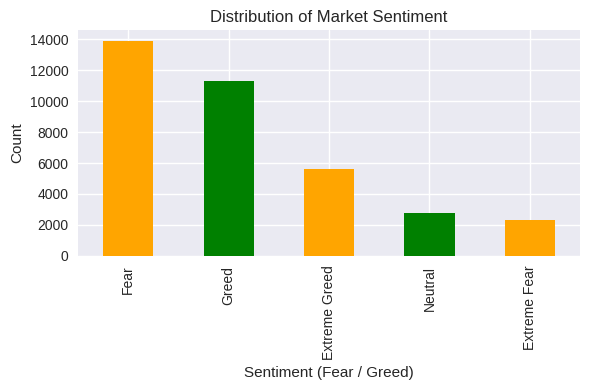

In [111]:
# ==============================================
#  UNIVARIATE ANALYSIS
# ==============================================


# --- 1. Sentiment distribution
plt.figure(figsize=(6,4))
merged['classification'].value_counts().plot(kind='bar', color=['orange','green'])
plt.title('Distribution of Market Sentiment')
plt.xlabel('Sentiment (Fear / Greed)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(f'{out_path}/sentiment_distribution.png')
plt.show()


**Insight:** The market exhibits a dominant presence of 'Fear' sentiment,
      followed by 'Greed'. Extreme sentiments (Extreme Fear / Extreme Greed)
      occur less frequently, indicating that the market often swings between
      positive and negative emotions rather than remaining neutral.

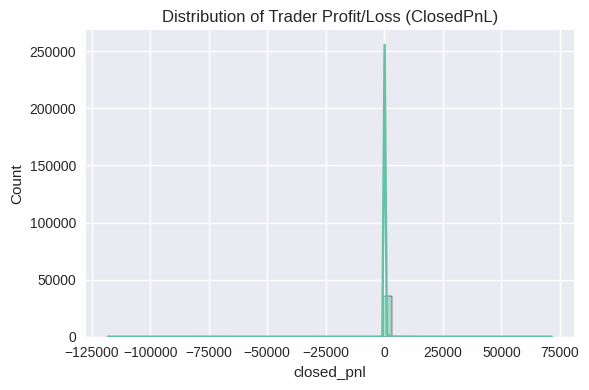

In [112]:
# --- 2. Closed PnL distribution
if 'closed_pnl' in merged.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(merged['closed_pnl'], bins=50, kde=True)
    plt.title('Distribution of Trader Profit/Loss (ClosedPnL)')
    plt.tight_layout()
    plt.savefig(f'{out_path}/pnl_distribution.png')
    plt.show()

In [113]:
# Check skewness value for ClosedPnL
merged['closed_pnl'].skew()

np.float64(-3.4874892934994417)

**Insight:** The ClosedPnL distribution is highly left-skewed (skewness ≈ -3.48), indicating that most trades result in small or moderate profits, while a few trades lead to very large losses.
This suggests that traders may be following risk-seeking strategies, where occasional big losses offset multiple small gains — a common behavior in speculative markets.

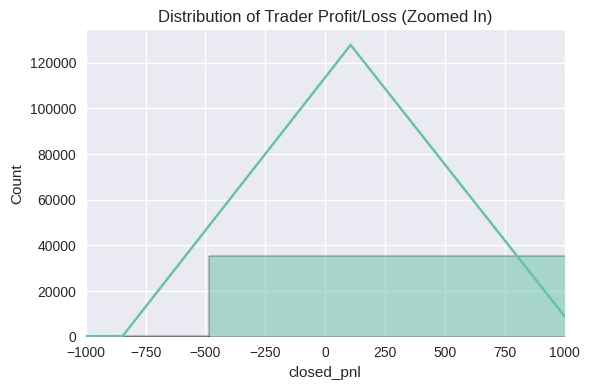

In [114]:
plt.figure(figsize=(6,4))
sns.histplot(merged['closed_pnl'], bins=100, kde=True)
plt.xlim(-1000, 1000)   # adjusting
plt.title('Distribution of Trader Profit/Loss (Zoomed In)')
plt.tight_layout()
plt.show()

**Insight:** The zoomed-in distribution of ClosedPnL shows that most trades cluster tightly around the 0 value, meaning traders typically realize very small gains or losses per trade.
The slightly left-skewed shape (longer lower tail) indicates the presence of a few larger loss trades, even though the majority of trades remain near break-even.
This pattern reflects risk-averse trading behavior, where most traders close positions with minimal profit or loss, while only a few trades result in significant losses.

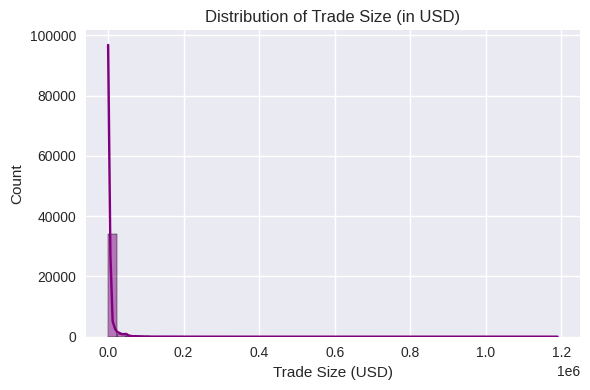

In [115]:
# --- 3. Trade Size (USD) Distribution
if 'size_usd' in merged.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(merged['size_usd'], bins=50, color='purple', kde=True)
    plt.title('Distribution of Trade Size (in USD)')
    plt.xlabel('Trade Size (USD)')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig(f'{out_path}/trade_size_usd_distribution.png')
    plt.show()

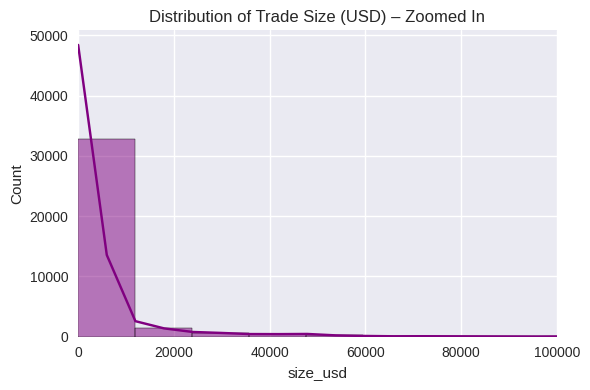

In [116]:
plt.figure(figsize=(6,4))
sns.histplot(merged['size_usd'], bins=100, color='purple', kde=True)
plt.xlim(0, 100000)  # Zoom in on trades under $100K
plt.title('Distribution of Trade Size (USD) – Zoomed In')
plt.tight_layout()
plt.show()

**Insight:** The distribution of trade sizes (in USD) is highly right-skewed, indicating that most trades are executed with small capital exposure, while a small number of trades involve very large USD amounts.
This behavior suggests that the majority of traders prefer low-risk, smaller positions, while a minority of high-volume participants (possibly institutional or high-risk traders) execute significantly larger trades.
After cleaning the dataset, the skew became more pronounced, meaning missing or invalid rows previously masked this concentration of small trades.

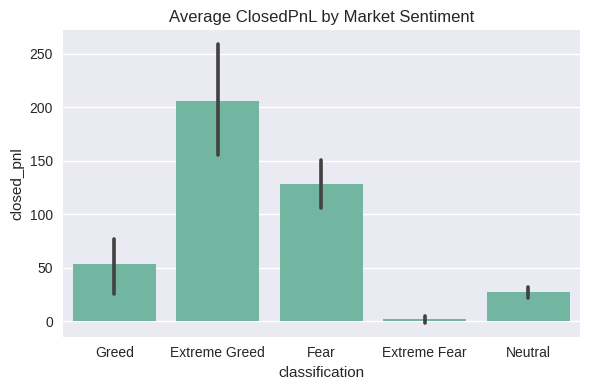

In [117]:
# ==============================================
#  BIVARIATE ANALYSIS
# ==============================================

# --- 1. Sentiment vs Average ClosedPnL
if 'closed_pnl' in merged.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(data=merged, x='classification', y='closed_pnl', estimator=np.mean)
    plt.title('Average ClosedPnL by Market Sentiment')
    plt.tight_layout()
    plt.savefig(f'{out_path}/avg_pnl_by_sentiment.png')
    plt.show()

**Insight:** The chart shows that trader profitability (ClosedPnL) is strongly influenced by market sentiment.

* During Extreme Greed phases, traders achieve the highest average profits, indicating that optimism and strong bullish momentum drive higher gains.

* Fear phases also show moderate profits, suggesting cautious yet still active trading behavior.

* Greed and Neutral periods yield lower average profits, possibly due to reduced volatility or balanced sentiment.

* In contrast, Extreme Fear phases result in negligible profits, reflecting minimal market activity and high caution among traders.

This pattern highlights that trader performance peaks during high-confidence (Greed) periods, while risk-averse behavior dominates during Fear phases. It also implies that market sentiment can serve as a valuable indicator for predicting trader engagement and profitability.

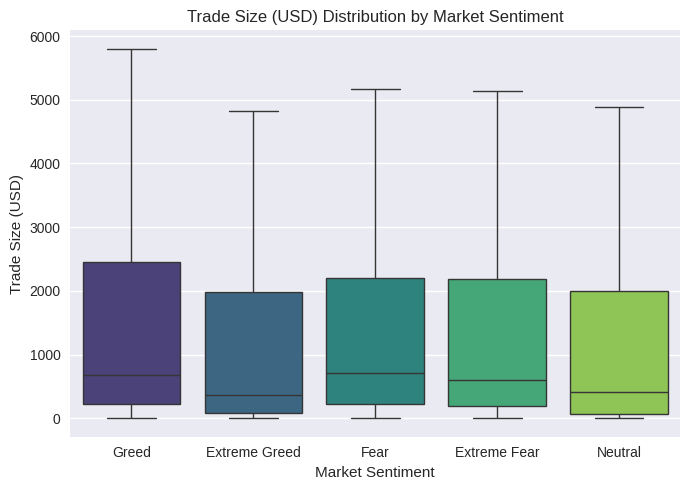

In [118]:
# --- 2. Sentiment vs Trade Size (USD)
if 'size_usd' in merged.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=merged, x='classification', y='size_usd', showfliers=False, palette='viridis')
    plt.title('Trade Size (USD) Distribution by Market Sentiment')
    plt.xlabel('Market Sentiment')
    plt.ylabel('Trade Size (USD)')
    plt.tight_layout()
    plt.savefig(f'{out_path}/trade_size_by_sentiment.png')
    plt.show()

**Insight:** The distribution of trade sizes (in USD) across different market sentiments shows that traders tend to adjust their exposure based on overall market mood.

* Greed and Fear periods exhibit larger median trade sizes and wider variability, suggesting higher trading activity and risk-taking during emotionally charged market phases.

* Extreme Greed shows slightly lower median size but still wide variation, indicating a mix of aggressive and cautious strategies among traders.

* Extreme Fear and Neutral sentiments display smaller median trade sizes, showing that traders prefer to reduce exposure or remain conservative during uncertain or directionless markets.

This pattern highlights that trader confidence and position size increase during Greed and Fear, while Extreme Fear drives a more defensive approach.

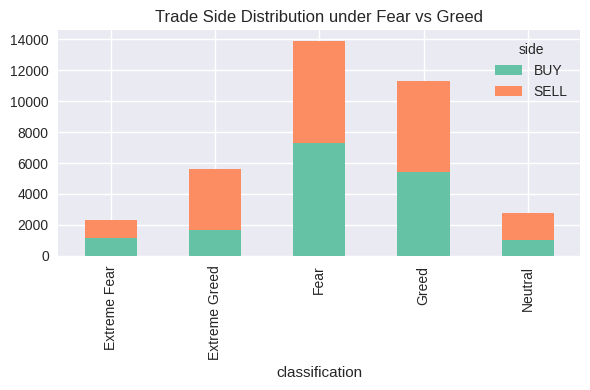

In [119]:
# --- 3. Sentiment vs Trade Side (long/short)
if 'side' in merged.columns:
    side_dist = merged.groupby(['classification','side']).size().unstack(fill_value=0)
    side_dist.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title('Trade Side Distribution under Fear vs Greed')
    plt.tight_layout()
    plt.savefig(f'{out_path}/side_distribution.png')
    plt.show()

**Insight:** The trade side distribution indicates that traders' buy and sell behaviors vary noticeably across different sentiment phases:

* During Fear and Greed phases, there is a balanced yet active mix of BUY and SELL trades, showing that traders are highly engaged when emotions dominate the market.

* In Extreme Greed, SELL trades slightly outnumber BUY trades — possibly due to traders taking profits after strong bullish movements.

* In contrast, Extreme Fear periods show a higher proportion of SELL trades, reflecting panic-driven selling and risk aversion.

* Neutral sentiment has the lowest trading activity, suggesting reduced market participation when direction is uncertain.

Overall, traders tend to buy more during optimism (Greed) and sell more during pessimism (Fear), confirming that emotional market conditions significantly influence trading decisions.

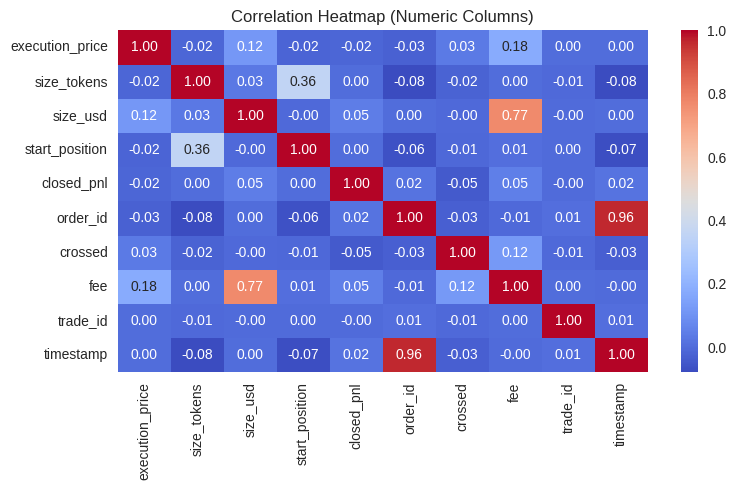

In [120]:
# ==============================================
#  MULTIVARIATE ANALYSIS
# ==============================================

# --- 1. Correlation Heatmap (numeric columns)
plt.figure(figsize=(8,5))
sns.heatmap(merged.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Columns)')
plt.tight_layout()
plt.savefig(f'{out_path}/correlation_heatmap.png')
plt.show()

**Insight:** The correlation heatmap shows that most numeric variables exhibit low to moderate correlation, indicating that the dataset’s numeric features are largely independent.

* A strong positive correlation (0.77) exists between fee and size_usd, confirming that larger trades incur higher transaction fees, as expected in trading systems.

* order_id and timestamp (0.96) are also highly correlated, reflecting their sequential nature in trade recording — they do not represent a meaningful analytical relationship but rather indexing behavior.

* The closed_pnl (profit/loss) column shows very weak correlation with other numeric features such as trade size, execution price, or fee, implying that profitability is not directly determined by trade amount or cost, but likely by timing and market sentiment.

* Other variable pairs show near-zero correlation, confirming low multicollinearity and a diverse data structure suitable for behavioral exploration.

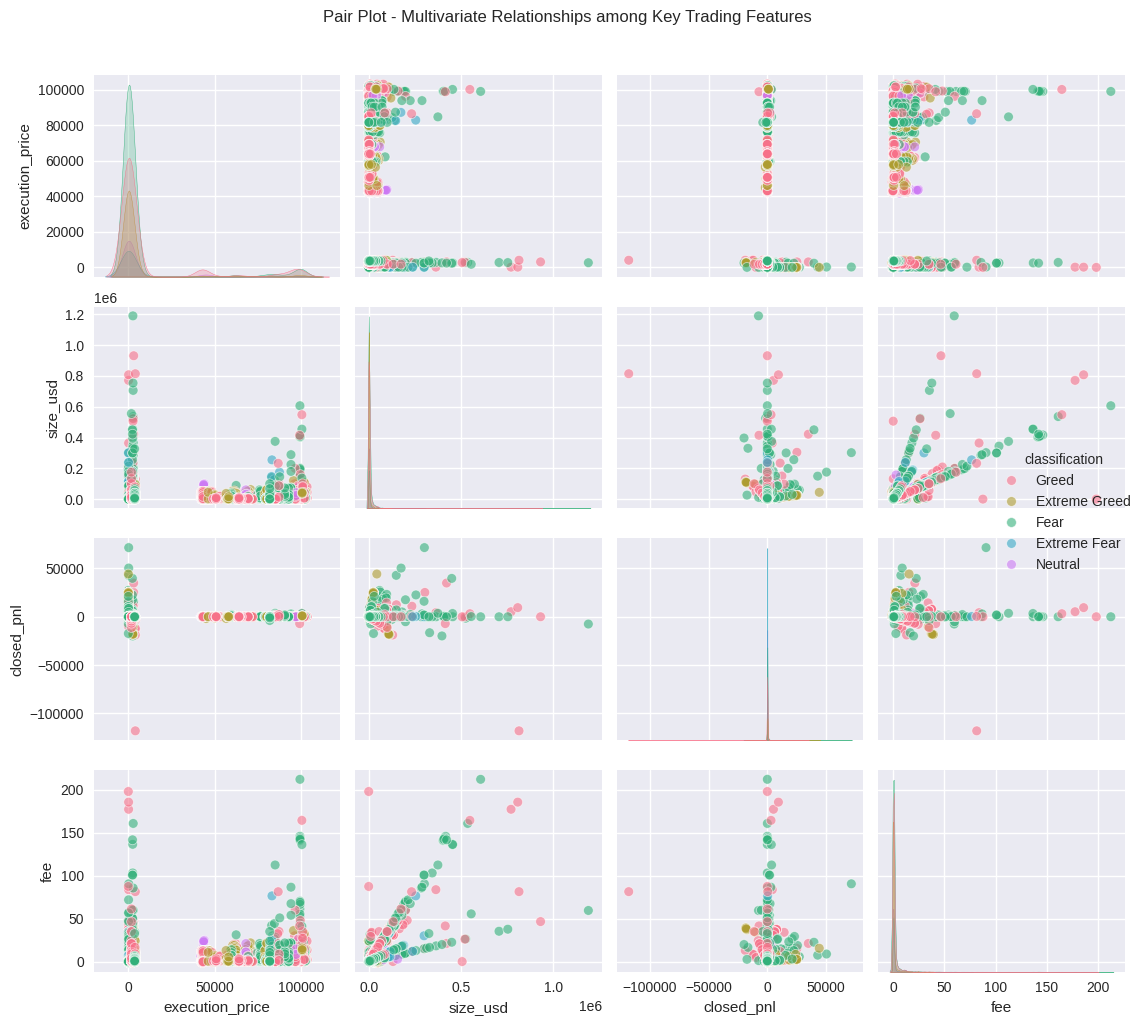

In [121]:
# --- 2. Pair Plot (numeric columns)

# Select relevant numeric columns
numeric_cols = ['execution_price', 'size_usd', 'closed_pnl', 'fee']

# Optional: Add sentiment to color the points
sns.pairplot(data=merged, vars=numeric_cols, hue='classification',
             plot_kws={'alpha':0.6}, diag_kind='kde', palette='husl')

plt.suptitle('Pair Plot - Multivariate Relationships among Key Trading Features', y=1.02)
plt.tight_layout()
plt.savefig(f'{out_path}/pairplot_multivariate.png')
plt.show()

**Insight:** The pair plot highlights key relationships between major trading variables and market sentiment:

* Execution Price vs Fee and Trade Size (USD) vs Fee show a clear positive relationship — higher trade values or prices lead to proportionally higher fees.

* Trade Size (USD) vs ClosedPnL displays a slight upward trend, suggesting that larger trades tend to yield higher profits, although the distribution is quite scattered due to volatility and outliers.

* ClosedPnL appears independent of execution price and fee, confirming that profit/loss is influenced more by market timing and sentiment than by trade cost or volume alone.

* The color clusters show that Extreme Greed trades are often associated with higher trade sizes and positive PnL values, whereas Extreme Fear and Neutral sentiments mostly concentrate near smaller trades and lower PnL values.

Overall, the pair plot supports the finding that trader performance improves during Greed phases with higher risk exposure, while Fear-driven markets lead to smaller, more conservative trades.

## SUMMARY OF INSIGHTS

- **Trader Behavior:** Most trades occur under *Fear* and *Greed* sentiments, indicating that emotional market phases drive higher participation.

- **Profitability Patterns:** Traders achieve the highest average profits during *Extreme Greed* phases, while *Extreme Fear* results in minimal returns.  

- **Trade Size Trends:** Majority of trades are small in USD value, suggesting a dominance of low-risk strategies.  

- **Sentiment Impact:** Market sentiment strongly influences both trade volume and profitability — Greed phases correlate with higher exposure and volatility.  

- **Independence of Variables:** Numeric features show low inter-correlation, confirming that trader behavior is sentiment-driven rather than purely numeric.


## Recommendations

- Trading systems can leverage **sentiment analysis** to predict trader engagement and market volatility.  
- Risk management should focus on **Extreme Fear** phases where emotional selling can trigger larger-than-expected losses.  
- During **Greed** periods, implement stricter trade-size controls to limit overexposure from overconfidence-driven trading.  
- Encourage **data-driven strategies** over emotional trading decisions to maintain consistent profitability across sentiment shifts.


In [122]:
#Save Outputs

merged.to_csv(f'{out_path}/cleaned_trading_data.csv', index=False)


# CONCLUSION

This analysis successfully explored the relationship between trader performance and market sentiment.  
Findings reveal that emotions like Fear and Greed significantly impact trading volume, position size, and profitability.  
These insights can help design smarter, sentiment-aware trading strategies and improve overall market timing.